In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [8]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [9]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
for row in session.query(Measurement.date).order_by(Measurement.date.desc()).first():
    print(row)

2017-08-23


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recent_date= dt.datetime(2017,8,23)

# Calculate the date one year from the last date in data set.
oneyear_prep = recent_date - dt.timedelta(365)
#print(oneyear_prep)# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=oneyear_prep).all()

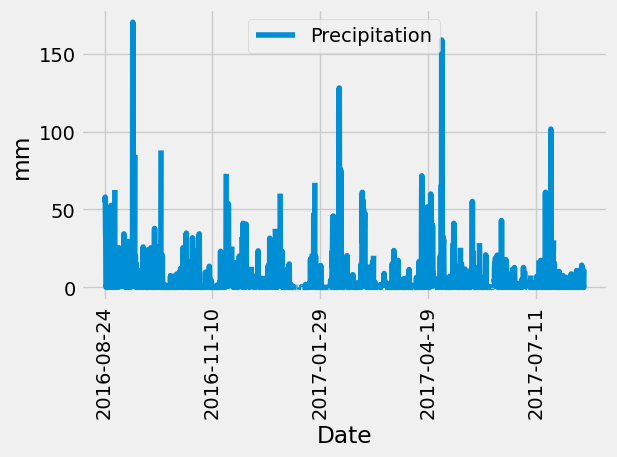

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
recent_date= dt.datetime(2017,8,23)

# Calculate the date one year from the last date in data set.
oneyear_prep = recent_date - dt.timedelta(365)
#print(oneyear_prep)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=oneyear_prep).all()
# print(data)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_data= pd.DataFrame(data,columns=["Date","Precipitation"])
# prcp_data.head()

# Sort the dataframe by date
sorted_data=prcp_data.sort_values(by="Date")
# sorted_data.head()

# Use Pandas Plotting with Matplotlib to plot the data
# sorted_data.set_index('Date',inplace= True)
sorted_data.plot(x="Date", y= "Precipitation",rot=90)
plt.ylabel("mm")
plt.tight_layout()
plt.show()


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_data.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(Station).count()
print(total_station)

9


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# max count station 
active_station = session.query(Measurement.station,func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [86]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stat= session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').all()
station_stat

[(12.2, 29.4, 22.03582251082252)]

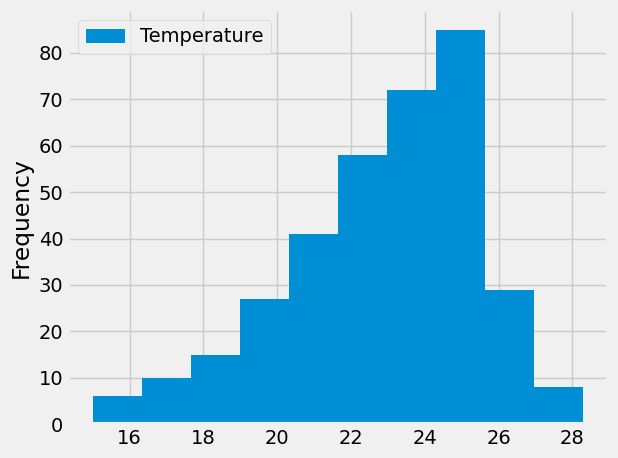

In [87]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
filter(Measurement.date>=oneyear_prep).all()
# print(data)
df = pd.DataFrame(data,columns=["Temperature"])
df.plot.hist()
plt.tight_layout()
plt.show()

# Close Session

In [88]:
# Close Session
session.close()
